# Assignment 5

In [105]:
import numpy as np
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px
import cv2
import matplotlib.pyplot as plt

### 1.Load the 5 images and plot them. Make sure the name of the file is displayed on the title of the relevant image. 

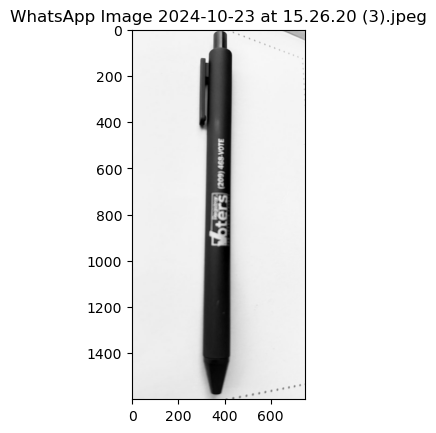

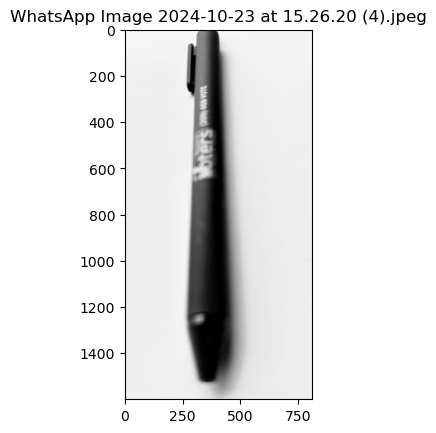

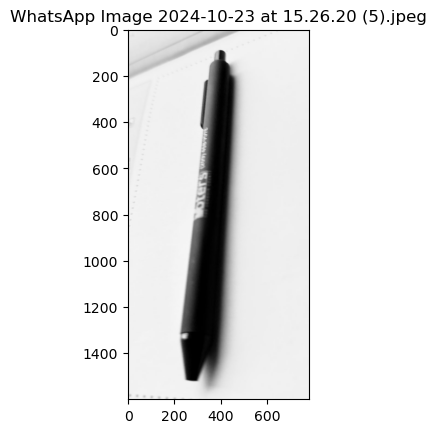

FileNotFoundError: [Errno 2] No such file or directory: '/Users/aran/Desktop/Semester 1/Introduction to machine learning/assignments/image compression PCA/pen data/WhatsApp Image 2024-10-23 at 15.26.20.jpeg'

In [157]:
path = '/Users/aran/Desktop/Semester 1/Introduction to machine learning/assignments/image compression PCA/pen data'
images = []
for img in sorted_file:
  if img.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  
    img_path = os.path.join(path, img)
    imgArray = np.array(Image.open(img_path))
    images.append(imgArray)


    plt.imshow(imgArray)
   
    plt.title(img)   # Display the image name as the title
    plt.show()

In [159]:
X = np.array(imgArray)
print(X)
X.shape

[[[238 238 238]
  [238 238 238]
  [238 238 238]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[238 238 238]
  [238 238 238]
  [238 238 238]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[238 238 238]
  [238 238 238]
  [238 238 238]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 ...

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[240 240 240]
  [241 241 241]
  [241 241 241]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]]


(1600, 782, 3)

### 2. Set up a pipeline that scales the values linearly between 0 and 1 and applies PCA such that 5 images from different


In [161]:
X_train = X.reshape(X.shape[2],X.shape[0]*X.shape[1])
X_train =  X_train.T
X_train.shape

(1251200, 3)

In [163]:
pca_pipeline = Pipeline(steps=[
    ('scale',MinMaxScaler()),
    ('pca',PCA(n_components=1, svd_solver = 'arpack'))
])

In [165]:

pca_pipeline.fit(X_train)

Pipeline(steps=[('scale', MinMaxScaler()),
                ('pca', PCA(n_components=1, svd_solver='arpack'))])

 ### 3. Report the number of features and the number of samples.

In [167]:
n_samples = pca_pipeline[-1].n_samples_
n_features = pca_pipeline[-1].n_features_in_

print('Number of samples:', n_samples)
print('Number of features:', n_features)


Number of samples: 1251200
Number of features: 3


### 4. What are the PCA directions? 

In [169]:
pca_directions = pca_pipeline[-1].components_
print('PCA directions:', pca_directions)

PCA directions: [[ 0.08054688  0.64817271 -0.75722146]]


### 5. What is the explained variance ratio when using only this 1 image? 

In [171]:
explained_variance_ratio = pca_pipeline[-1].explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)


Explained variance ratio: [0.48102389]


### 6.  What is the value of the last pixel in the new image? 

In [173]:

X_pca = pca_pipeline.transform(X_train)

last_pixel_value = X_pca[-1, -1]  
print('Value of the last pixel in the new image:', last_pixel_value)


Value of the last pixel in the new image: -0.01869710884584243


In [175]:
print("Original shape:", X.shape)  # This will give you (5, 7651, 7551)
print("X_pca shape:", X_pca.shape)  # Should give (5, height*width)


Original shape: (1600, 782, 3)
X_pca shape: (1251200, 1)


### 7.Display the new image

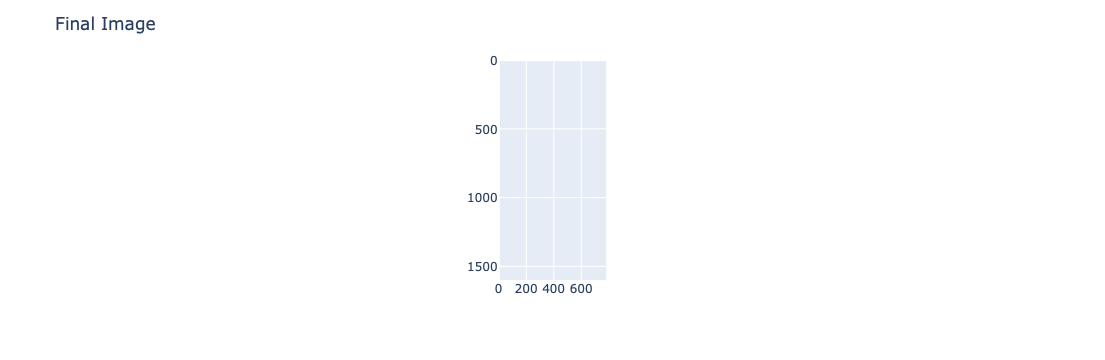

In [181]:
fig2 = px.imshow(X_pca.reshape(1600, 782), binary_string = True)
fig2.update_layout (title = 'Final Image')
fig2.show()